In [222]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
%matplotlib inline


In [223]:
df =pd.read_csv('/content/drive/My Drive/Colab Notebooks/dataset/banknote1.csv')
df.head()

,V1,V2,V3,V4,Class
0,3.62160,8.6661,-2.8073,-0.44699,1
1,4.54590,8.1674,-2.4586,-1.46210,1
2,3.86600,-2.6383,1.9242,0.10645,1
3,3.45660,9.5228,-4.0112,-3.59440,1
4,0.32924,-4.4552,4.5718,-0.98880,1


In [224]:
df=df.rename(columns ={'V1':'variance','V2':'skewness','V3':'curtosis','V4':'entropy'})

df_test = df.drop(columns={'Class'})

In [225]:
df_test .head()

,variance,skewness,curtosis,entropy
0,3.62160,8.6661,-2.8073,-0.44699
1,4.54590,8.1674,-2.4586,-1.46210
2,3.86600,-2.6383,1.9242,0.10645
3,3.45660,9.5228,-4.0112,-3.59440
4,0.32924,-4.4552,4.5718,-0.98880


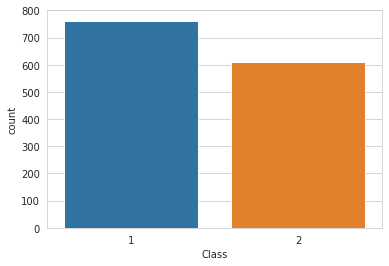

In [226]:
sns.countplot(x='Class',data =df)

In [227]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
dtypes: float64(4)
memory usage: 43.0 KB


In [228]:
df.describe()

,variance,skewness,curtosis,entropy,Class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,1.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,1.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,1.000000
50%,0.496180,2.319650,0.616630,-0.586650,1.000000
75%,2.821475,6.814625,3.179250,0.394810,2.000000
max,6.824800,12.951600,17.927400,2.449500,2.000000


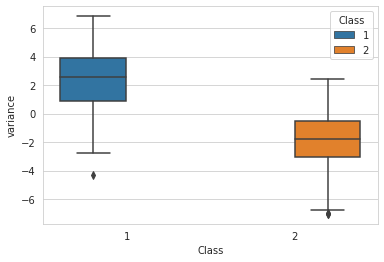

In [229]:
sns.boxplot(x='Class',y='variance',data=df,hue='Class')

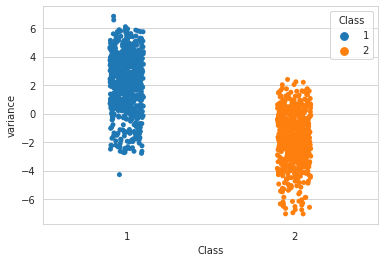

In [230]:
sns.stripplot(x='Class',y='variance',data=df,hue='Class')

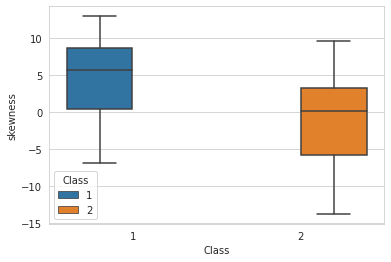

In [231]:
sns.boxplot(x='Class',y='skewness',data=df,hue='Class')

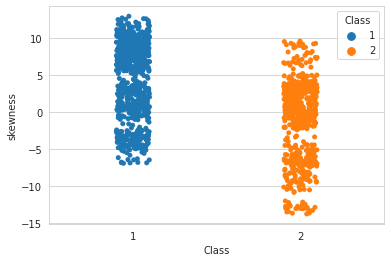

In [232]:
sns.stripplot(x='Class',y='skewness',data=df,hue='Class')

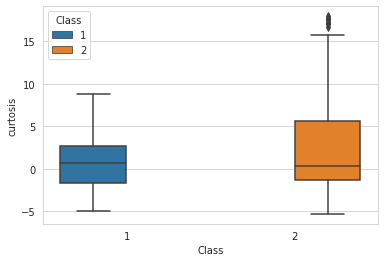

In [233]:
sns.boxplot(x='Class',y='curtosis',data=df,hue='Class')

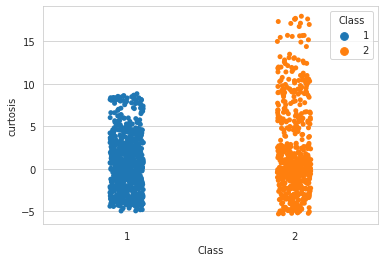

In [234]:
sns.stripplot(x='Class',y='curtosis',data=df,hue = 'Class')

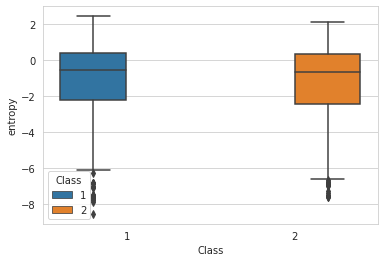

In [235]:
sns.boxplot(x='Class',y='entropy',data=df,hue='Class')

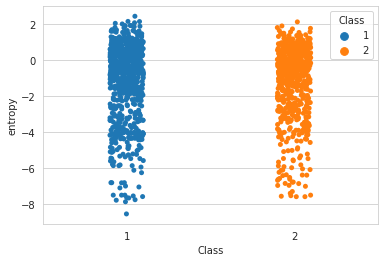

In [236]:
sns.stripplot(x='Class',y='entropy',data=df,hue='Class')

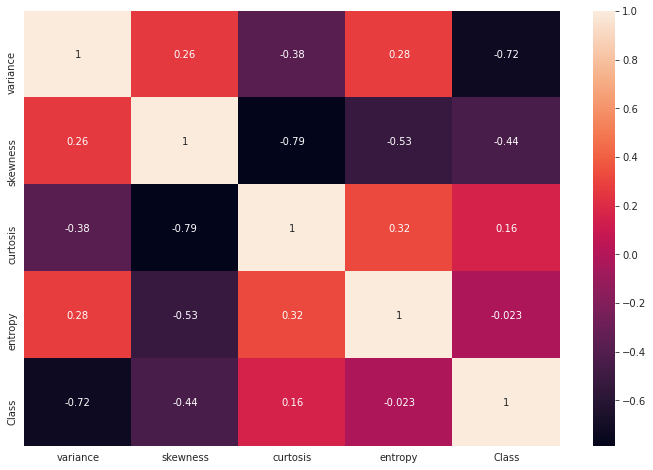

In [237]:
fig,ax=plt.subplots(figsize=(12,8))
corrmat=df.corr()
sns.heatmap(corrmat,annot=True,ax=ax)

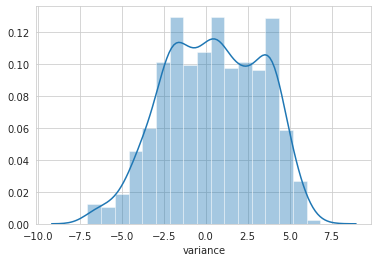

In [238]:
sns.distplot(df.variance)

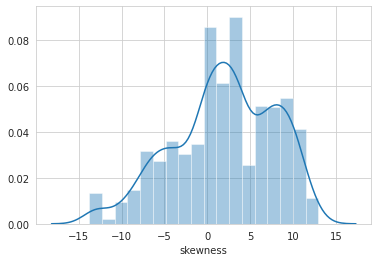

In [309]:
sns.distplot(df.skewness)


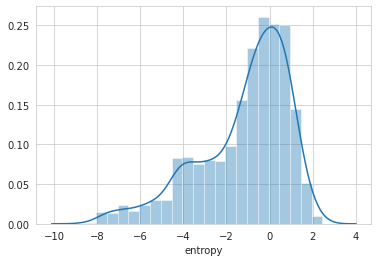

In [240]:
sns.distplot(df.entropy)


#Evaluation of dataset if the given dataset is suitable for the K-Means clustering

In [241]:
target_y=df['Class']
target_x = df[['variance','skewness','curtosis','entropy']]

In [242]:
target_x.shape

(1372, 4)

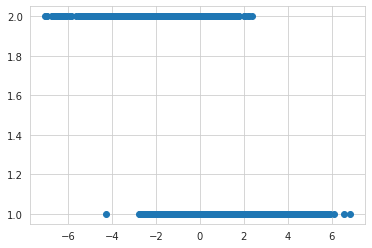

In [243]:
plt.scatter(df['variance'],df['Class'])

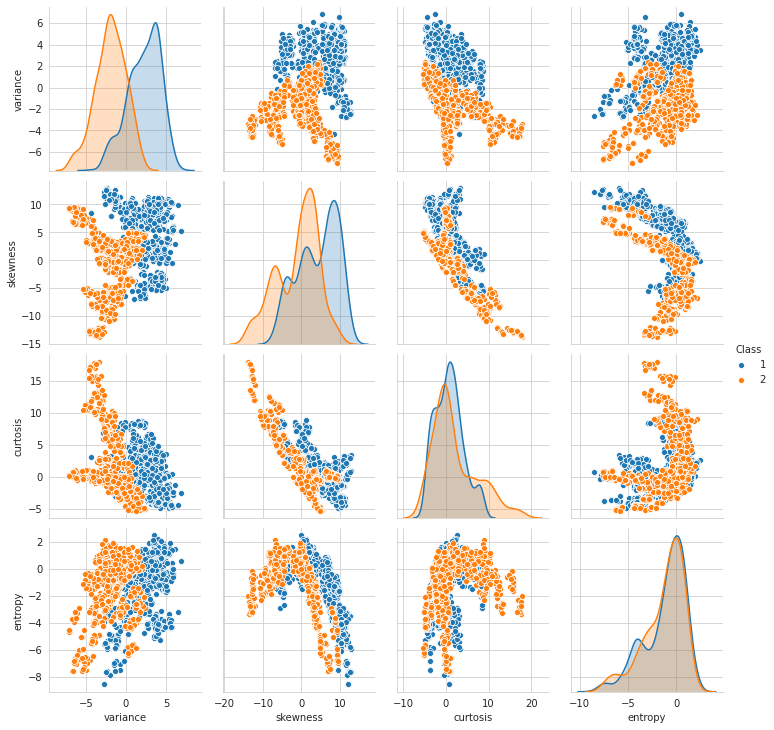

In [244]:
sns.pairplot(df,hue='Class')
sns.set_style('whitegrid')

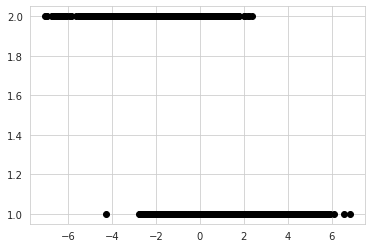

In [245]:
plt.scatter(target_x['variance'],target_y,color='black')

#Short description of the dataset and  evaluation of its suitability for the K-Means clustering task.

#Description of dataset
1. There is 1372 rows in dataset.which do not contain any null values.
2. There is some ammount of outlier in variance ,but it is tolerable.
3.  the curtosis and entropy feature is skewed 
4.  Variance and Class has negative correlation between them 
5. Genuine note has a mean variance around 2 and mean skewness around 4 whereas forged note has mean variance -1.8 and mean skewness around -1
6. The skewness and curtosis are correalted to each other more than 70%



#Suitability of K-means clustering task
1. If we notice the pairplot we certainly see the trend of  clustering..Class 1 is colured as blue and class 2 is colured as 1.the two  separate cluster is visible easily.Hence we can apply k-means clustering alogrithm on this dataset 

2. We clearly see from scatterplot that there is certainly  cluster though the cluster has overlapping situation but kmneans alogorithm can handle it.so we can apply k-means 

3. In every stirpplot we draw against Class we get visual  cluster in dataset

In [305]:
km= KMeans(n_clusters=5)
predicted = km.fit_predict(df[['variance','skewness']])
predicted

array([1, 1, 0, ..., 3, 3, 4], dtype=int32)

In [302]:
df_test['cluster'] = predicted
df.head()

,variance,skewness,curtosis,entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,1
1,4.54590,8.1674,-2.4586,-1.46210,1
2,3.86600,-2.6383,1.9242,0.10645,1
3,3.45660,9.5228,-4.0112,-3.59440,1
4,0.32924,-4.4552,4.5718,-0.98880,1


In [307]:
km.cluster_centers_

array([[ 3.18995175, -2.0217455 ],
       [ 2.72120945,  7.83283585],
       [-3.19242378,  9.3524    ],
       [-2.32610626, -8.03243231],
       [-0.53194755,  1.63416756]])

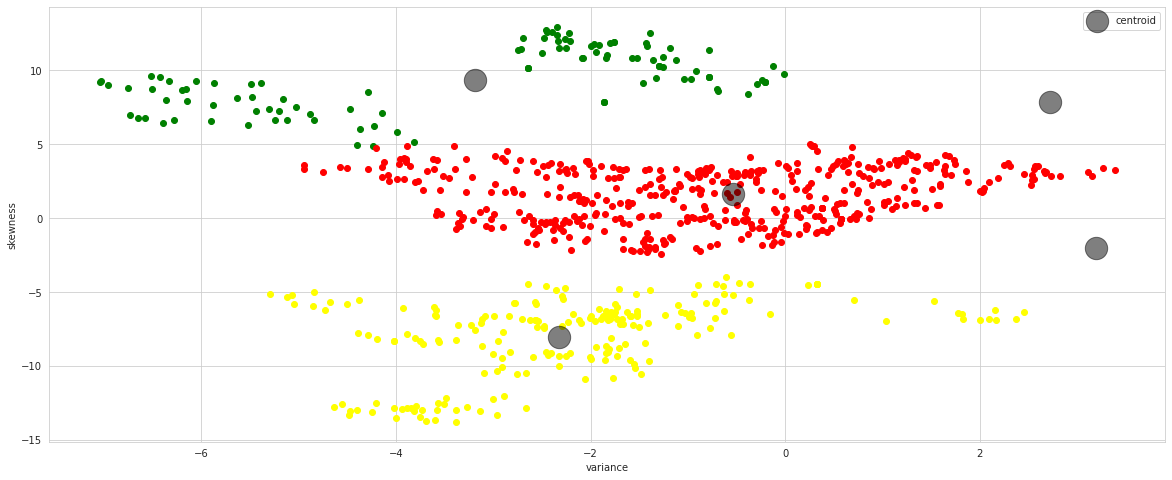

In [308]:
fig ,ax =plt.subplots(figsize =(20,8))
df1 = df_test[df_test.cluster==0]
df2 = df_test[df_test.cluster==1]
df3 = df_test[df_test.cluster==2]
plt.scatter(df1['variance'],df1['skewness'],color='green')
plt.scatter(df2['variance'],df2['skewness'],color='red')
plt.scatter(df3['variance'],df3['skewness'],color='yellow')


plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='black',marker='o',label='centroid',s=500,alpha=0.5)
plt.xlabel('variance')
plt.ylabel('skewness')
plt.legend()

1. At first i use elbow method to determine the number of cluster and i got 5 can give the best result.
2. All the data was standarized before performing kmeans
3. After perform kmeans several times the graph becomes stable
4. We clearly see the five cluster in the graph
5. I plot variance(v1) and skewness(v2) in the graph

In [286]:
variance=df['variance']
skewness=df['skewness']
entropy = df['entropy']
curtosis = df['curtosis']
x=np.column_stack((variance,skewness))

In [266]:
x.shape

(1372, 3)

In [271]:


sse = []
k_rng = range(1,10)
for k in range(1,10):
  km2 = KMeans(n_clusters=k)
  km2.fit(x)
  sse.append(km2.inertia_)
  

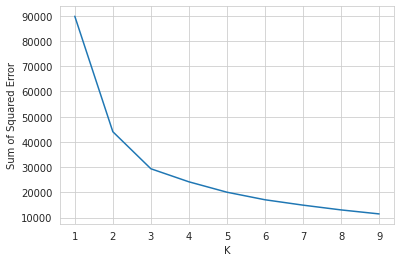

In [272]:
plt.xlabel('K')
plt.ylabel('Sum of Squared Error')
plt.plot(range(1,10),sse)

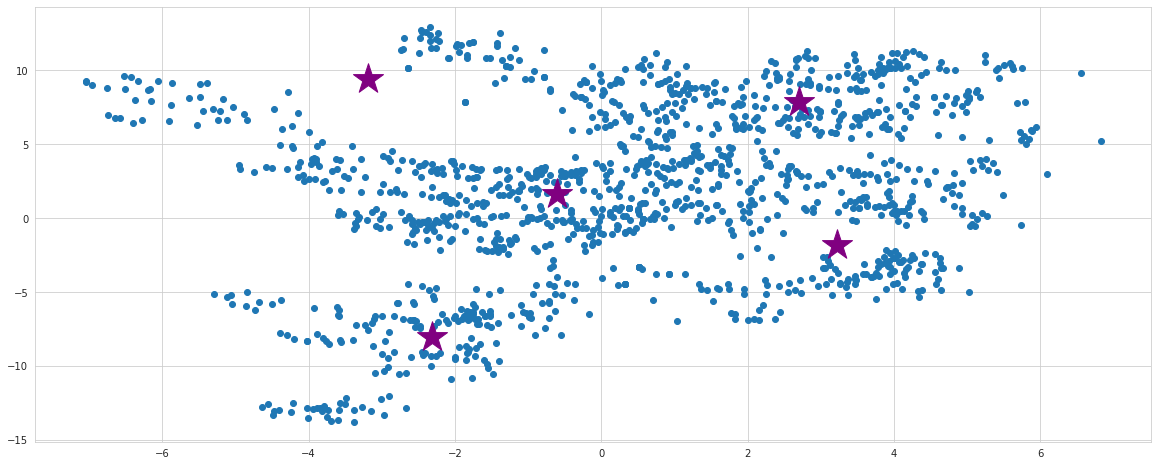

In [293]:
km2 = KMeans(n_clusters=5)
km2.fit(x)
fig,ax = plt.subplots(figsize=(20,8))
plt.scatter(variance,skewness)
plt.scatter(km2.cluster_centers_[:,0],km2.cluster_centers_[:,1],color='purple',marker ='*',label = 'centroid',s=1000)